# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from GloVe.weights import *
from Polarization.polarization_plots import *
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from Axes.projection_functions import *
from Polarization.polarization_functions import *
import math
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

os.chdir("../")

# **Overall polarization, right wing VS left wing newspapers**

In [2]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA', 'MET']
right_np = ['TE', 'DE', 'DM']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [19]:
real_pol = []
random_pol = []
CI_lows_real= []
CI_high_real = []
CI_lows_random= []
CI_high_random = []

for i in tqdm(range(14)) : 

    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    df = df[df['source'] != 'par'][['year', 'party', 'text', 'source', 'keywords', 'Speaker']]
    df['party'] = df['source'].apply(translate_party)
    df['Speaker'] = [i for i in range(len(df))] # Question ici : chaque journal est un speaker ou chaque article est un speaker ? 
    year = eval('201'+str(i))

    values = compute_polarization_and_CI(df, year, party_1, party_2)

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print('Year 201'+str(i)+' computed')

  7%|▋         | 1/14 [00:36<07:49, 36.10s/it]

Year 2010 computed


 14%|█▍        | 2/14 [01:15<07:34, 37.87s/it]

Year 2011 computed


 21%|██▏       | 3/14 [02:05<07:58, 43.46s/it]

Year 2012 computed


 29%|██▊       | 4/14 [03:02<08:08, 48.86s/it]

Year 2013 computed


 36%|███▌      | 5/14 [04:10<08:21, 55.76s/it]

Year 2014 computed


 43%|████▎     | 6/14 [05:20<08:05, 60.69s/it]

Year 2015 computed


 50%|█████     | 7/14 [06:39<07:45, 66.48s/it]

Year 2016 computed


 57%|█████▋    | 8/14 [07:49<06:46, 67.79s/it]

Year 2017 computed


 64%|██████▍   | 9/14 [09:00<05:43, 68.72s/it]

Year 2018 computed


 71%|███████▏  | 10/14 [10:06<04:31, 67.93s/it]

Year 2019 computed


 79%|███████▊  | 11/14 [11:03<03:13, 64.44s/it]

Year 20110 computed


 86%|████████▌ | 12/14 [12:04<02:07, 63.58s/it]

Year 20111 computed


 93%|█████████▎| 13/14 [12:50<00:58, 58.18s/it]

Year 20112 computed


100%|██████████| 14/14 [13:26<00:00, 57.64s/it]

Year 20113 computed


In [20]:
df_pol_newspapers = pd.DataFrame({'real polarization' : real_pol,
'random polarization' : random_pol,
'real low CI' : CI_lows_real,
'real high CI' : CI_high_real,
'random low CI' : CI_lows_random,
'random high CI' : CI_high_random })

df_pol_newspapers.to_csv('data/polarization values/left right newspapers polarisation values', index=False)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2010+i for i in range(len(real_pol))]

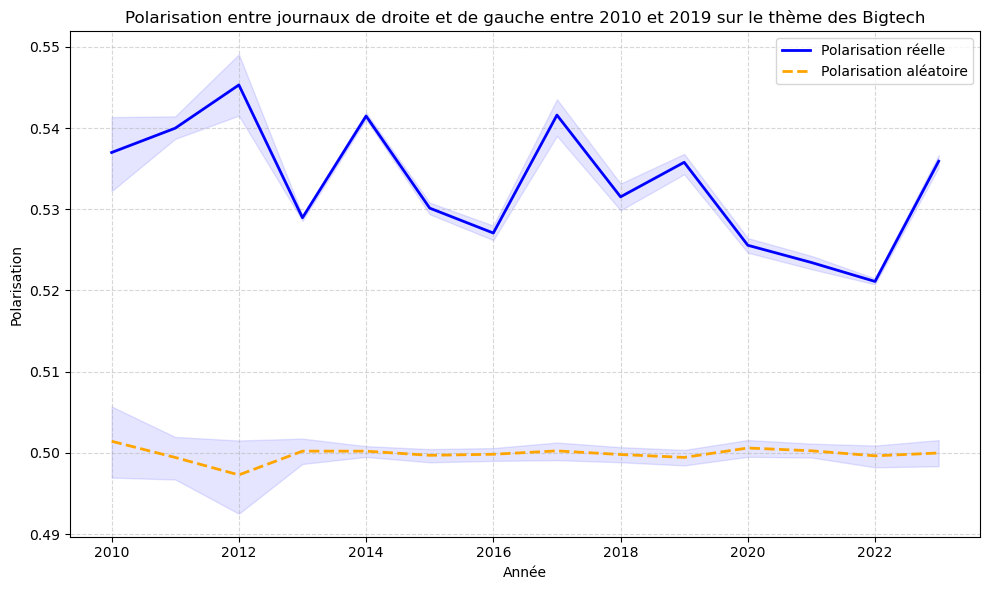

In [21]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(x, real_pol, label='Polarisation réelle', color='blue', linewidth=2)  # Tracé de la polarisation réelle
plt.fill_between(x, CI_lows_real, CI_high_real, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance
plt.plot(x, random_pol, label='Polarisation aléatoire', color='orange', linestyle='--', linewidth=2)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(x, CI_lows_random, CI_high_random, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance

plt.title('Polarisation entre journaux de droite et de gauche entre 2010 et 2019 sur le thème des Bigtech')  # Titre du graphique
plt.xlabel('Année')  # Nom de l'axe des x
plt.ylabel('Polarisation')  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique

# **Tabloids VS broadsheets**

In [16]:
party_1 = 'Lab'
party_2 = 'Con'

tab_np = ['DE', 'DM', 'MET']
broad_np = ['TE', 'GUA']

def translate_type(newspaper) :
    if newspaper in broad_np :
        return 'Lab'
    else :
        return 'Con'

In [17]:
real_pol = []
random_pol = []
CI_lows_real= []
CI_high_real = []
CI_lows_random= []
CI_high_random = []

for i in tqdm(range(10)) : 

    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    df = df[df['source'] != 'par'][['year', 'party', 'text', 'source', 'keywords', 'Speaker']]
    df['party'] = df['source'].apply(translate_party)
    df['Speaker'] = [i for i in range(len(df))] # Question ici : chaque journal est un speaker ou chaque article est un speaker ? 
    year = eval('201'+str(i))

    values = compute_polarization_and_CI(df, year, party_1, party_2)

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print('Year 201'+str(i)+' computed')

  0%|          | 0/10 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
df_pol_tabloids = pd.DataFrame({'real polarization' : real_pol,
'random polarization' : random_pol,
'real low CI' : CI_lows_real,
'real high CI' : CI_high_real,
'random low CI' : CI_lows_random,
'random high CI' : CI_high_random })

df_pol_tabloids.to_csv('data/polarization values/tabloids vs broadsheets newspapers polarisation values', index=False)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2010+i for i in range(len(real_pol))]

In [ ]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(x, real_pol, label='Polarisation réelle', color='blue', linewidth=2)  # Tracé de la polarisation réelle
plt.fill_between(x, CI_lows_real, CI_high_real, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance
plt.plot(x, random_pol, label='Polarisation aléatoire', color='orange', linestyle='--', linewidth=2)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(x, CI_lows_random, CI_high_random, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance

plt.title('Polarisation entre tabloids et broadsheets entre 2010 et 2019 sur le thème des Bigtech')  # Titre du graphique
plt.xlabel('Année')  # Nom de l'axe des x
plt.ylabel('Polarisation')  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique

# **Guardian VS Telegraph**

In [9]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA']
right_np = ['TE']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [11]:
real_pol = []
random_pol = []
CI_lows_real= []
CI_high_real = []
CI_lows_random= []
CI_high_random = []

for i in tqdm(range(14)) : 

    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    df = df[df['source'] != 'par'][['year', 'party', 'text', 'source', 'keywords', 'Speaker']]
    df['party'] = df['source'].apply(translate_party)
    df['Speaker'] = [i for i in range(len(df))] # Question ici : chaque journal est un speaker ou chaque article est un speaker ? 
    year = eval('201'+str(i))

    values = compute_polarization_and_CI(df, year, party_1, party_2)

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print('Year 201'+str(i)+' computed')

  7%|▋         | 1/14 [00:41<09:05, 41.95s/it]

Year 2010 computed


 14%|█▍        | 2/14 [01:28<08:54, 44.54s/it]

Year 2011 computed


 21%|██▏       | 3/14 [02:15<08:24, 45.86s/it]

Year 2012 computed


 29%|██▊       | 4/14 [03:10<08:12, 49.21s/it]

Year 2013 computed


 36%|███▌      | 5/14 [04:12<08:07, 54.13s/it]

Year 2014 computed


 43%|████▎     | 6/14 [05:16<07:40, 57.51s/it]

Year 2015 computed


 50%|█████     | 7/14 [06:26<07:09, 61.38s/it]

Year 2016 computed


 57%|█████▋    | 8/14 [07:30<06:12, 62.13s/it]

Year 2017 computed


 64%|██████▍   | 9/14 [08:31<05:09, 61.85s/it]

Year 2018 computed


 71%|███████▏  | 10/14 [09:27<04:00, 60.06s/it]

Year 2019 computed


 79%|███████▊  | 11/14 [10:17<02:51, 57.04s/it]

Year 20110 computed


 86%|████████▌ | 12/14 [11:13<01:53, 56.64s/it]

Year 20111 computed


 93%|█████████▎| 13/14 [11:58<00:53, 53.04s/it]

Year 20112 computed


100%|██████████| 14/14 [12:34<00:00, 53.87s/it]

Year 20113 computed


In [14]:
df_pol_newspapers = pd.DataFrame({'real polarization' : real_pol,
'random polarization' : random_pol,
'real low CI' : CI_lows_real,
'real high CI' : CI_high_real,
'random low CI' : CI_lows_random,
'random high CI' : CI_high_random })

df_pol_newspapers.to_csv('data/polarization values/Guardian VS Telegraph polarisation values', index=False)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2010+i for i in range(len(real_pol))]

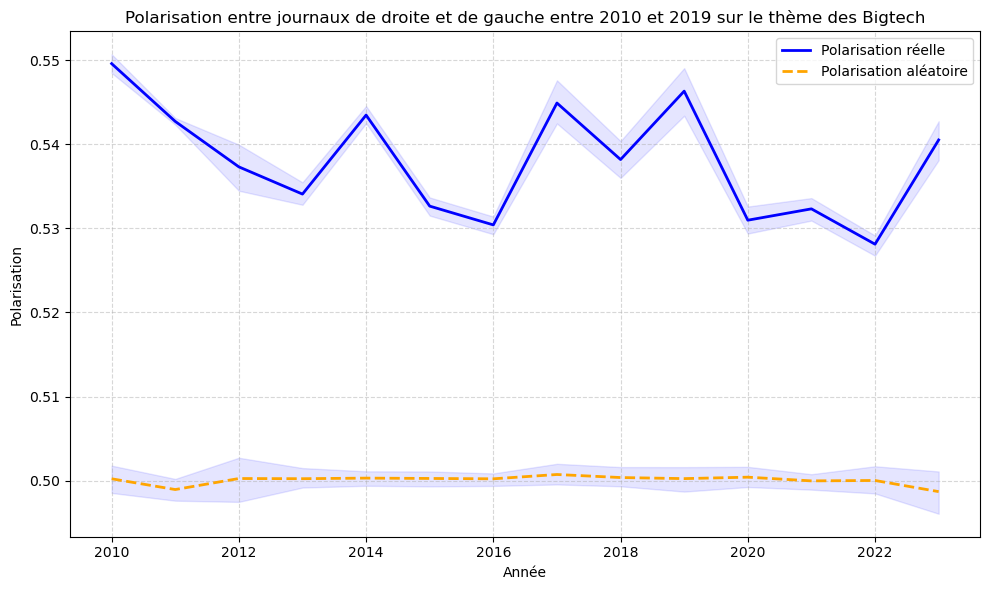

In [15]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(x, real_pol, label='Polarisation réelle', color='blue', linewidth=2)  # Tracé de la polarisation réelle
plt.fill_between(x, CI_lows_real, CI_high_real, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance
plt.plot(x, random_pol, label='Polarisation aléatoire', color='orange', linestyle='--', linewidth=2)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(x, CI_lows_random, CI_high_random, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance

plt.title('Polarisation entre journaux de droite et de gauche entre 2010 et 2019 sur le thème des Bigtech')  # Titre du graphique
plt.xlabel('Année')  # Nom de l'axe des x
plt.ylabel('Polarisation')  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique

# **Newspapers by company**

In [12]:
dfs_BT = []
for i in tqdm(range(10)) : 
    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    df = df[df['source'] != 'par']
    dfs_BT.append(df_BT(df))

100%|██████████| 10/10 [00:49<00:00,  4.92s/it]


In [14]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA', 'MET']
right_np = ['TE', 'DE', 'DM']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [ ]:
values_by_company = {}
companies = ['am', 'fb', 'ap', 'go', 'mi']

for company in companies :

    values_by_company[company] = {}

    values_by_company[company]['real_pol'] = []
    values_by_company[company]['random_pol'] = []
    values_by_company[company]['CI_lows_real'] = []
    values_by_company[company]['CI_high_real'] = []
    values_by_company[company]['CI_lows_random'] = []
    values_by_company[company]['CI_high_random'] = []
  

    for i in tqdm(range(10)) : 

        df = dfs_BT[i]
        df = df[df['source'] != 'par'][['year', 'party', 'text', 'source', 'keywords', 'Speaker', 'class']]
        df['party'] = df['source'].apply(translate_party)
        df['party'] = df['source'].apply(translate_party)
        df['Speaker'] = [i for i in range(len(df))]
        df = df[df['class'] == company]
        year = eval('201'+str(i))

        values = compute_polarization_and_CI(df, year, party_1, party_2)

        values_by_company[company]['real_pol'].append(values[0])
        values_by_company[company]['random_pol'].append(values[1])

        values_by_company[company]['CI_lows_real'].append(values[2])
        values_by_company[company]['CI_high_real'].append(values[3])
        values_by_company[company]['CI_lows_random'].append(values[4])
        values_by_company[company]['CI_high_random'].append(values[5])

        print('Year 201'+str(i)+' computed')

In [4]:
i = 2

In [5]:
str(['a', 'b', 'c'])

"['a', 'b', 'c']"

In [ ]:
df_pol_parliament_BT = {}
for company in companies :
    df_pol_parliament_BT[company] = pd.DataFrame(values_by_company[company])
    df_pol_parliament_BT[company].to_csv('data/polarization values/newspapers polarisation values '+company, index=False)

# **Polarization within broadsheets**

In [4]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA']
right_np = ['TE']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [6]:
real_pol = []
random_pol = []
CI_lows_real= []
CI_high_real = []
CI_lows_random= []
CI_high_random = []

for i in tqdm(range(6, 14)) : 

    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    df = df[df['source'] != 'par'][['year', 'party', 'text', 'source', 'keywords', 'Speaker']]
    df['party'] = df['source'].apply(translate_party)
    df['Speaker'] = [i for i in range(len(df))] # Question ici : chaque journal est un speaker ou chaque article est un speaker ? 
    year = eval('201'+str(i))

    values = compute_polarization_and_CI(df, year, party_1, party_2)

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print('Year 201'+str(i)+' computed')

 12%|█▎        | 1/8 [01:08<08:01, 68.80s/it]

Year 2016 computed


 25%|██▌       | 2/8 [02:08<06:21, 63.52s/it]

Year 2017 computed


 38%|███▊      | 3/8 [03:07<05:07, 61.54s/it]

Year 2018 computed


 50%|█████     | 4/8 [04:01<03:53, 58.29s/it]

Year 2019 computed


 62%|██████▎   | 5/8 [04:47<02:42, 54.07s/it]

Year 20110 computed


 75%|███████▌  | 6/8 [05:39<01:46, 53.34s/it]

Year 20111 computed


 88%|████████▊ | 7/8 [06:19<00:48, 48.87s/it]

Year 20112 computed


100%|██████████| 8/8 [06:51<00:00, 51.43s/it]

Year 20113 computed


In [10]:
df_pol_broadsheets = pd.DataFrame({'real polarization' : real_pol,
'random polarization' : random_pol,
'real low CI' : CI_lows_real,
'real high CI' : CI_high_real,
'random low CI' : CI_lows_random,
'random high CI' : CI_high_random })

df_pol_broadsheets.to_csv('data/polarization values/broadsheets polarisation values', index=False)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2016+i for i in range(len(real_pol))]

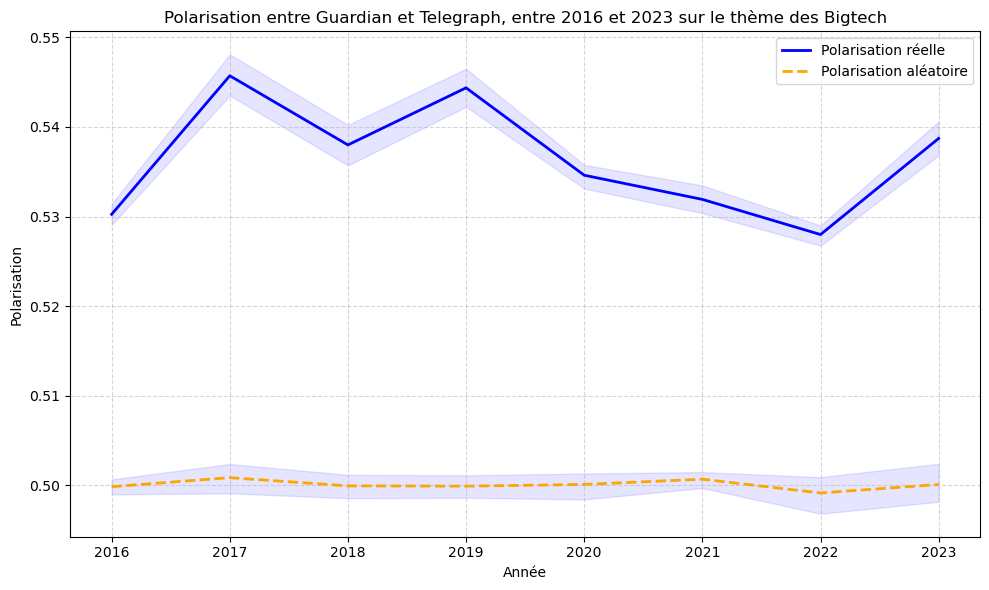

In [11]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(x, real_pol, label='Polarisation réelle', color='blue', linewidth=2)  # Tracé de la polarisation réelle
plt.fill_between(x, CI_lows_real, CI_high_real, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance
plt.plot(x, random_pol, label='Polarisation aléatoire', color='orange', linestyle='--', linewidth=2)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(x, CI_lows_random, CI_high_random, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance

plt.title('Polarisation entre Guardian et Telegraph, entre 2016 et 2023 sur le thème des Bigtech')  # Titre du graphique
plt.xlabel('Année')  # Nom de l'axe des x
plt.ylabel('Polarisation')  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique